In [12]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# NYC 311 Calls: An exploratory analysis of calls received in 2016

NYC 311 is a government organization that aims to provide the public with access to city services and information, and it allows city residents to make non-emergency complaints, such as a landlord not providing sufficient heat, or needing snow removed from an area along the sidewalk. We wanted to determine the relationship between the volume of NYC 311 calls and area demographics, hypothesizing that lower income areas would be more likely to be neglected by city agencies, leading to a larger number of NYC 311 calls in these areas. In order to begin our regression analysis, we explored the data available, ultimately choosing to utilize NYC OpenData for NYC 311 call information and the U.S. Census Bureau's American FactFinder for 2016 ACS information surrouding population, income, and rent. 

# Data Cleaning

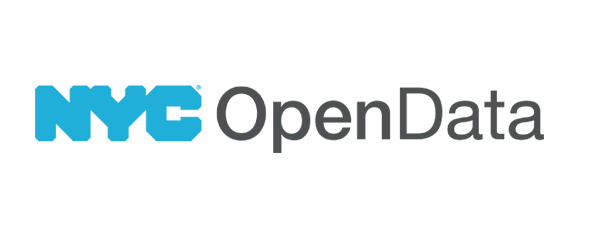

In [13]:
from IPython.display import Image
from IPython.display import display 

x = Image('open_data.png')
display(x)

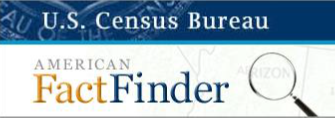

In [14]:
y = Image('acs.png')
display(y)

In [15]:
q1_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q1.csv')
q2_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q2.csv')
q3_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q3.csv')
q4_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q4.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
open_data_df = pd.concat([q1_df, q2_df, q3_df, q4_df])
open_data_df.head()

Unique Key            Created Date             Closed Date Agency  \
0    32305299  01/01/2016 12:00:09 AM  01/01/2016 01:57:32 AM   NYPD   
1    32310343  01/01/2016 12:00:40 AM  01/01/2016 03:12:53 AM   NYPD   
2    32309107  01/01/2016 12:01:09 AM  01/21/2016 09:20:55 AM    HPD   
3    32308578  01/01/2016 12:02:59 AM  01/01/2016 11:35:50 PM   NYPD   
4    32309212  01/01/2016 12:03:03 AM  01/08/2016 01:13:00 AM    HPD   

                                         Agency Name           Complaint Type  \
0                    New York City Police Department  Noise - Street/Sidewalk   
1                    New York City Police Department      Noise - Residential   
2  Department of Housing Preservation and Develop...                 ELECTRIC   
3                    New York City Police Department      Noise - Residential   
4  Department of Housing Preservation and Develop...           HEAT/HOT WATER   

         Descriptor               Location Type  Incident Zip  \
0  Loud Music/Party             Street/Sidewalk       11201.0   
1  Loud Music/Party  Residential Building/House       10468.0   
2       NO LIGHTING        RESIDENTIAL BUILDING       10467.0   
3  Loud Music/Party  Residential Building/House           NaN   
4   ENTIRE BUILDING        RESIDENTIAL BUILDING       10458.0   

       Incident Address                   ...                    Vehicle Type  \
0       102 GOLD STREET                   ...                             NaN   
1  3155 GRAND CONCOURSE                   ...                             NaN   
2    3572 DEKALB AVENUE                   ...                             NaN   
3      539 SIXTH AVENUE                   ...                             NaN   
4   2345 TIEBOUT AVENUE                   ...                             NaN   

  Taxi Company Borough Taxi Pick Up Location Bridge Highway Name  \
0                  NaN                   NaN                 NaN   
1                  NaN                   NaN                 NaN   
2                  NaN                   NaN                 NaN   
3                  NaN                   NaN                 NaN   
4                  NaN                   NaN                 NaN   

  Bridge Highway Direction Road Ramp Bridge Highway Segment   Latitude  \
0                      NaN       NaN                    NaN  40.701823   
1                      NaN       NaN                    NaN  40.875565   
2                      NaN       NaN                    NaN  40.884277   
3                      NaN       NaN                    NaN        NaN   
4                      NaN       NaN                    NaN  40.857841   

   Longitude                                 Location  
0 -73.982840  (40.70182309943841, -73.98284003196223)  
1 -73.886111  (40.87556453341452, -73.88611123391182)  
2 -73.878885   (40.8842770627239, -73.87888510394457)  
3        NaN                                      NaN  
4 -73.896607   (40.85784092074736, -73.8966070485658)  

[5 rows x 41 columns]

In [18]:
pop_df = pd.read_csv('ACS_16_Pop.csv', header=[1])
income_df = pd.read_csv('ACS_16_Income.csv', header=[1])
rent_df = pd.read_csv('ACS_16_Rent.csv', header=[1])

In [19]:
pop_df = pop_df.drop(columns=['Id', 'Geography', 'Margin of Error; Total'])
pop_df = pop_df.drop(pop_df.index[0])
pop_df = pop_df.drop(pop_df.index[0])
pop_df = pop_df.rename(index=str, columns={'Id2': 'Zip Code', 'Estimate; Total': 'Population Estimate'})

income_df = income_df.drop(income_df.columns[0], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[2:120], axis=1)
income_df = income_df.drop(income_df.index[0])
income_df = income_df.drop(income_df.index[0])
income_df = income_df.rename(index=str, columns={'Id2': 'Zip Code', 'Median income (dollars); Estimate; Households': 'Median Estimate'})

rent_df = rent_df.drop(columns=['Id', 'Geography', 'Margin of Error; Median gross rent'])
rent_df = rent_df.drop(rent_df.index[0])
rent_df = rent_df.drop(rent_df.index[0])
rent_df = rent_df.rename(index=str, columns={'Id2': 'Zip Code', 'Estimate; Median gross rent': 'Gross Rent Estimate'})

In [20]:
pop_df.head()

Zip Code  Population Estimate
2     10001                23332
3     10002                78096
4     10003                56767
5     10004                 3044
6     10005                 8710

In [21]:
income_df.head()

Zip Code Median Estimate
2     10001           85168
3     10002           35594
4     10003          100791
5     10004          123056
6     10005          130116

In [22]:
rent_df.head()

Zip Code Gross Rent Estimate
2     10001                2114
3     10002                 919
4     10003                2117
5     10004                2911
6     10005                3005

In [24]:
rentandincome = pd.merge(rent_df, income_df, on='Zip Code')
data = pd.merge(rentandincome, pop_df, on='Zip Code')

open_data_df = open_data_df[open_data_df['Incident Zip'].notnull()]

open_data_df['Zip Code'] = open_data_df['Incident Zip'].astype(np.int64)

final_open_data_df = open_data_df.drop(['Unique Key', 'Location', 'Closed Date','Agency Name', 'Descriptor', 'Location Type', 'Incident Address', 'Street Name', 'Cross Street 1','Cross Street 2', 'Intersection Street 1', 'Intersection Street 2','Address Type', 'City', 'Landmark', 'Facility Type', 'Status','Due Date', 'Resolution Description', 'Resolution Action Updated Date','Community Board', 'BBL','X Coordinate (State Plane)','Y Coordinate (State Plane)', 'Open Data Channel Type','Park Facility Name', 'Park Borough', 'Vehicle Type','Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name','Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment','Latitude', 'Longitude'], axis = 1)

df = pd.merge(final_open_data_df, data, left_on='Zip Code', right_on='Zip Code')

In [26]:
df = df[df['Gross Rent Estimate'] != '-']
df = df[df['Gross Rent Estimate'] != 0]
df = df[df['Median Estimate'] != '-']
df = df[df['Median Estimate'] != 0]
df = df[df['Population Estimate'] != 0]
df = df[df['Borough'] != 'Unspecified']

df['Created Date'] = df['Created Date'].apply(lambda x: str(x).split(' ')[0])
df['Created Date'] = df['Created Date'].apply(lambda x: str(x).split('/')[0])
df['Created Date'] = df['Created Date'].apply(lambda x: int(x))

df['Median Estimate'] = df['Median Estimate'].apply(lambda x: str(x).split('+')[0])
df['Gross Rent Estimate'] = df['Gross Rent Estimate'].apply(lambda x: str(x).split('+')[0])

df['Gross Rent Estimate'] = df['Gross Rent Estimate'].apply(lambda x: int(x))

df['Median Estimate'] = df['Median Estimate'].apply(lambda x: x.strip(','))

df['Median Estimate'] = df['Median Estimate'].replace('250,000', '250000')

df['Median Estimate'] = df['Median Estimate'].apply(lambda x: int(x))

conditions = [(df['Created Date'] == 1), (df['Created Date'] == 2), (df['Created Date'] == 3), (df['Created Date'] == 4), (df['Created Date'] == 5), (df['Created Date'] == 6), (df['Created Date'] == 7), (df['Created Date'] == 8), (df['Created Date'] == 9), (df['Created Date'] == 10), (df['Created Date'] == 11), (df['Created Date'] == 12)]
choices = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
df['Created Date'] = np.select(conditions, choices, default='black')

df_all = df

After using Pandas to create DataFrames with our data, we cleaned the data and merged the DataFrames to show the population demographics associated with each NYC 311 call based on zip code. During this process, there were at least a dozen times in which we strongly believed we were done with cleaning the data, but we would then notice another necessary data cleaning step. 

In [27]:
df_all.head()

Created Date Agency           Complaint Type  Incident Zip   Borough  \
0       Winter   NYPD  Noise - Street/Sidewalk       11201.0  BROOKLYN   
1       Winter   NYPD      Noise - Residential       11201.0  BROOKLYN   
2       Winter   NYPD      Noise - Residential       11201.0  BROOKLYN   
3       Winter   NYPD      Noise - Residential       11201.0  BROOKLYN   
4       Winter   NYPD  Noise - Street/Sidewalk       11201.0  BROOKLYN   

   Zip Code  Gross Rent Estimate  Median Estimate  Population Estimate  
0     11201                 2103           109472                60061  
1     11201                 2103           109472                60061  
2     11201                 2103           109472                60061  
3     11201                 2103           109472                60061  
4     11201                 2103           109472                60061

In [31]:
len(df_all)

1847866

At this point, we were extremely confident with our DataFrame and were about to start regression analysis. However, we realized that each row is associated with a single 311 call, yet our goal was to predict the number of 311 calls based on population demographics. In order to do this, we then grouped the data by zip code and created a new column that showed the count of 311 calls in each zip code for every season. Once we did this, we also created dummy variables for the seasons and boroughs. 

In [32]:
df_winter = df_all[df_all['Created Date'] == 'Winter']
df_spring = df_all[df_all['Created Date'] == 'Spring']
df_summer = df_all[df_all['Created Date'] == 'Summer']
df_fall = df_all[df_all['Created Date'] == 'Fall']


df_winter = df_winter.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()
df_spring = df_spring.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()
df_summer = df_summer.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()
df_fall = df_fall.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()

df_all_seasons = pd.concat([df_winter, df_spring, df_summer, df_fall], axis = 0)

dummies = pd.get_dummies(df_all_seasons['Created Date'])
dummies.head()

df_all_seasons = pd.concat([df_all_seasons, dummies], axis=1)

borough_dummies = pd.get_dummies(df_all_seasons['Borough'])

df_all_seasons = pd.concat([df_all_seasons, borough_dummies], axis=1)

df_all_seasons['count_zip_code'] = df_all_seasons['Zip Code']

df_all_seasons = df_all_seasons.rename(index=str, columns={'Created Date': 'created_date', 'Gross Rent Estimate': 'gross_rent', 'Median Estimate': 'income', 'Population Estimate': 'pop', 'Zip Code': 'zip', 'Fall': 'fall', 'Spring': 'spring', 'Summer': 'summer', 'Winter': 'winter', 'BRONX': 'bronx', 'BROOKLYN': 'brooklyn', 'MANHATTAN': 'manhattan', 'QUEENS': 'queens', 'STATEN ISLAND': 'staten_island'})

In [33]:
df_all_seasons.head()

created_date  gross_rent  income    pop    Borough   zip  fall  spring  \
0       Winter         645   24610  12468   BROOKLYN   411     0       0   
1       Winter         705   21553  38938      BRONX  2272     0       0   
2       Winter         744   31371  43444   BROOKLYN  1895     0       0   
3       Winter         758   26893  34187  MANHATTAN  2385     0       0   
4       Winter         851   23962  42779      BRONX  2887     0       0   

   summer  winter  bronx  brooklyn  manhattan  queens  staten_island  \
0       0       1      0         1          0       0              0   
1       0       1      1         0          0       0              0   
2       0       1      0         1          0       0              0   
3       0       1      0         0          1       0              0   
4       0       1      1         0          0       0              0   

   count_zip_code  
0             411  
1            2272  
2            1895  
3            2385  
4            2887

# EDA

Before beginning our regression analysis, we needed to better understand our data and chose to analyze the way in which the dependent variables interact with the explanatory variable through visualizations and collinearity analysis. 

In [35]:
df = pd.read_csv('df_regression.csv')
df = df.drop(['Unnamed: 0'], axis=1)

data_pred = df.copy()
data_pred = data_pred.drop(columns=['created_date', 'zip', 'Borough'])
data_pred.head()

gross_rent  income    pop  fall  spring  summer  winter  bronx  brooklyn  \
0         645   24610  12468     0       0       0       1      0         1   
1         705   21553  38938     0       0       0       1      1         0   
2         744   31371  43444     0       0       0       1      0         1   
3         758   26893  34187     0       0       0       1      0         0   
4         851   23962  42779     0       0       0       1      1         0   

   manhattan  queens  staten_island  count_zip_code  
0          0       0              0             411  
1          0       0              0            2272  
2          0       0              0            1895  
3          1       0              0            2385  
4          0       0              0            2887

In [36]:
data_pred.corr()

gross_rent    income       pop      fall    spring    summer  \
gross_rent        1.000000  0.869473 -0.438015  0.002624 -0.001114 -0.002245   
income            0.869473  1.000000 -0.488446  0.002519 -0.001187 -0.002219   
pop              -0.438015 -0.488446  1.000000  0.002910  0.001546  0.001442   
fall              0.002624  0.002519  0.002910  1.000000 -0.332744 -0.335101   
spring           -0.001114 -0.001187  0.001546 -0.332744  1.000000 -0.333918   
summer           -0.002245 -0.002219  0.001442 -0.335101 -0.333918  1.000000   
winter            0.000738  0.000890 -0.005909 -0.332744 -0.331570 -0.333918   
bronx            -0.279082 -0.270258  0.116260 -0.000306  0.000918 -0.001525   
brooklyn         -0.175563 -0.199882  0.406091 -0.004123 -0.002530  0.001723   
manhattan         0.524909  0.452973 -0.228616  0.004896 -0.000472 -0.003948   
queens           -0.042454 -0.058274 -0.187176 -0.000547  0.001645  0.003715   
staten_island    -0.153342  0.032610 -0.081312 -0.000199  0.000599 -0.000994   
count_zip_code   -0.393206 -0.485080  0.729236 -0.021451 -0.023048 -0.029021   

                  winter     bronx  brooklyn  manhattan    queens  \
gross_rent      0.000738 -0.279082 -0.175563   0.524909 -0.042454   
income          0.000890 -0.270258 -0.199882   0.452973 -0.058274   
pop            -0.005909  0.116260  0.406091  -0.228616 -0.187176   
fall           -0.332744 -0.000306 -0.004123   0.004896 -0.000547   
spring         -0.331570  0.000918 -0.002530  -0.000472  0.001645   
summer         -0.333918 -0.001525  0.001723  -0.003948  0.003715   
winter          1.000000  0.000918  0.004931  -0.000472 -0.004825   
bronx           0.000918  1.000000 -0.208909  -0.227706 -0.286283   
brooklyn        0.004931 -0.208909  1.000000  -0.297768 -0.374369   
manhattan      -0.000472 -0.227706 -0.297768   1.000000 -0.408054   
queens         -0.004825 -0.286283 -0.374369  -0.408054  1.000000   
staten_island   0.000599 -0.104145 -0.136189  -0.148443 -0.186630   
count_zip_code  0.073661  0.264151  0.334014  -0.122133 -0.324478   

                staten_island  count_zip_code  
gross_rent          -0.153342       -0.393206  
income               0.032610       -0.485080  
pop                 -0.081312        0.729236  
fall                -0.000199       -0.021451  
spring               0.000599       -0.023048  
summer              -0.000994       -0.029021  
winter               0.000599        0.073661  
bronx               -0.104145        0.264151  
brooklyn            -0.136189        0.334014  
manhattan           -0.148443       -0.122133  
queens              -0.186630       -0.324478  
staten_island        1.000000       -0.090249  
count_zip_code      -0.090249        1.000000

In [37]:
abs(data_pred.corr()) > .75

gross_rent  income    pop   fall  spring  summer  winter  \
gross_rent            True    True  False  False   False   False   False   
income                True    True  False  False   False   False   False   
pop                  False   False   True  False   False   False   False   
fall                 False   False  False   True   False   False   False   
spring               False   False  False  False    True   False   False   
summer               False   False  False  False   False    True   False   
winter               False   False  False  False   False   False    True   
bronx                False   False  False  False   False   False   False   
brooklyn             False   False  False  False   False   False   False   
manhattan            False   False  False  False   False   False   False   
queens               False   False  False  False   False   False   False   
staten_island        False   False  False  False   False   False   False   
count_zip_code       False   False  False  False   False   False   False   

                bronx  brooklyn  manhattan  queens  staten_island  \
gross_rent      False     False      False   False          False   
income          False     False      False   False          False   
pop             False     False      False   False          False   
fall            False     False      False   False          False   
spring          False     False      False   False          False   
summer          False     False      False   False          False   
winter          False     False      False   False          False   
bronx            True     False      False   False          False   
brooklyn        False      True      False   False          False   
manhattan       False     False       True   False          False   
queens          False     False      False    True          False   
staten_island   False     False      False   False           True   
count_zip_code  False     False      False   False          False   

                count_zip_code  
gross_rent               False  
income                   False  
pop                      False  
fall                     False  
spring                   False  
summer                   False  
winter                   False  
bronx                    False  
brooklyn                 False  
manhattan                False  
queens                   False  
staten_island            False  
count_zip_code            True

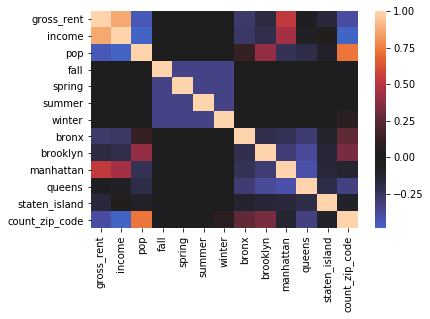

In [38]:
sns.heatmap(data_pred.corr(), center = 0)

## What appears to be the best represenation for each independent variable? 

After looking at the below distributions, the population variable appeared to most closely be normally distributed without taking its log, while the income and rent variables appeared to most closely be normaly distrbuted when taking their logs. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a175780>,
      dtype=object)

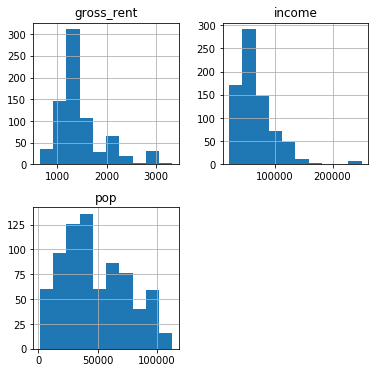

In [39]:
data = df
data[['created_date', 'gross_rent', 'income', 'pop', ]].hist(figsize  = [6, 6])

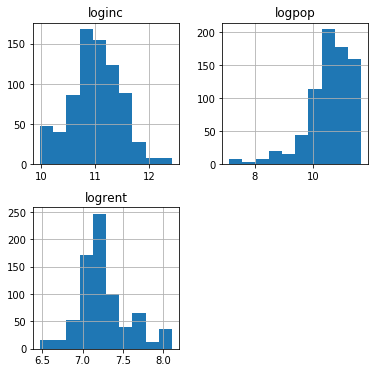

In [40]:
data_log = pd.DataFrame([])
data_log['logrent'] = np.log(data['gross_rent'])
data_log['loginc'] = np.log(data['income'])
data_log['logpop'] = np.log(data['pop'])
data_log.hist(figsize  = [6, 6]);

## What borough experienced the greatest number of 311 calls?

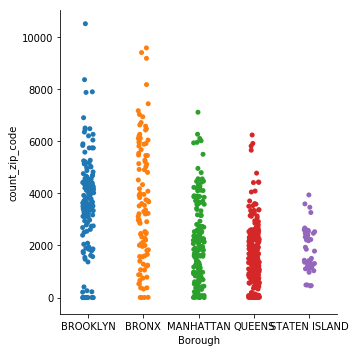

In [41]:
borough_plot = df.drop(['created_date', 'gross_rent', 'income', 'pop', 'zip', 'bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island', 'winter', 'spring', 'summer', 'fall'], axis=1)
sns.catplot(x='Borough', y='count_zip_code', data=borough_plot);

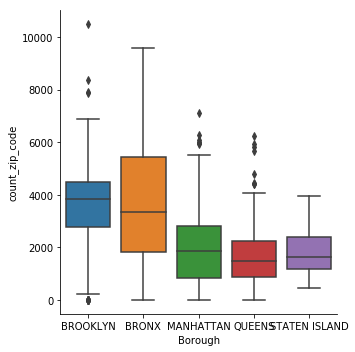

In [42]:
sns.catplot(x='Borough', y='count_zip_code', kind="box", data=borough_plot);

## What season experienced the greatest number of 311 calls?

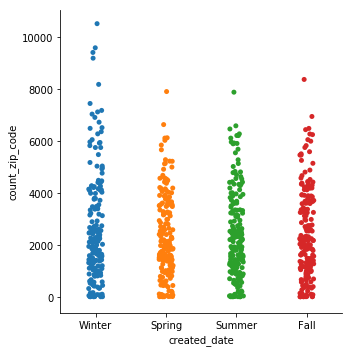

In [43]:
season_plot = df.drop(['Borough', 'gross_rent', 'income', 'pop', 'zip', 'bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island', 'winter', 'spring', 'summer', 'fall'], axis=1)
sns.catplot(x='created_date', y='count_zip_code', data=season_plot);

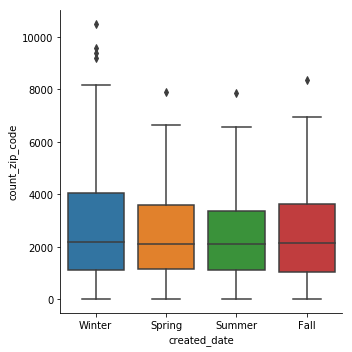

In [44]:
sns.catplot(x='created_date', y='count_zip_code', kind="box", data=season_plot);

## Do the relationships between our countinuous independent variables and the number of 311 calls appear linear?

Text(0,0.5,'Number of 311 Calls')

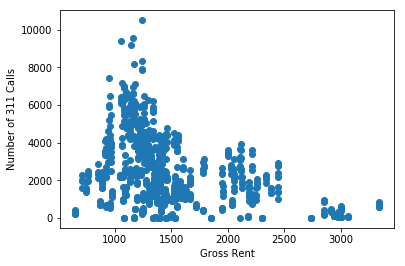

In [45]:
plt.scatter(df['gross_rent'], df['count_zip_code'])
plt.xlabel('Gross Rent')
plt.ylabel('Number of 311 Calls')

Text(0,0.5,'Number of 311 Calls')

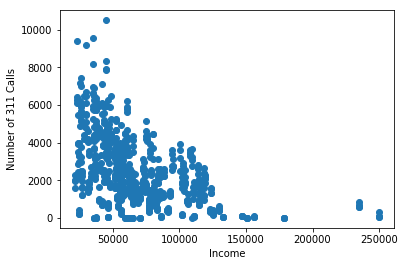

In [46]:
plt.scatter(df['income'], df['count_zip_code'])
plt.xlabel('Income')
plt.ylabel('Number of 311 Calls')

Text(0,0.5,'Number of 311 Calls')

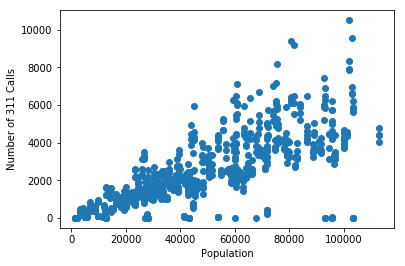

In [47]:
plt.scatter(df['pop'], df['count_zip_code'])
plt.xlabel('Population')
plt.ylabel('Number of 311 Calls')

# Regression Analysis

Before making any changes to our model, we ran an OLS regression with population, income, rent, season dummies, and borough dummies as our independent variables, and we observed the below results. 

In [49]:
data_ols = data_pred.copy()
outcome = 'count_zip_code'
predictors = data_ols.drop('count_zip_code', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          2.48e-150
Time:                        10:41:26   Log-Likelihood:                -6365.8
No. Observations:                 755   AIC:                         1.275e+04
Df Residuals:                     744   BIC:                         1.280e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
gross_rent        0.4949      0.183      2.704      0.007       0.136       0.854
income           -0.0163      0.003     -6.223      0.000      -0.021      -0.011
pop               0.0394      0.002     21.162      0.000       0.036       0.043
fall            496.8733    135.347      3.671      0.000     231.166     762.581
spring          493.5310    135.253      3.649      0.000     228.008     759.054
summer          477.0825    134.986      3.534      0.000     212.084     742.081
winter          808.3937    134.888      5.993      0.000     543.587    1073.201
bronx          1039.6967    127.297      8.167      0.000     789.793    1289.601
brooklyn        551.9690    139.600      3.954      0.000     277.912     826.026
manhattan       613.1853    154.222      3.976      0.000     310.423     915.947
queens         -211.0494    110.126     -1.916      0.056    -427.245       5.146
staten_island   282.0788    159.535      1.768      0.077     -31.113     595.271
==============================================================================
Omnibus:                      103.560   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.910
Skew:                          -0.443   Prob(JB):                    9.86e-133
Kurtosis:                       7.306   Cond. No.                     1.02e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After completing a variety of model iterations, and with our knowledge of the relationship between the independent variables and the explanatory variable, we ultimately found our strongest results were when we also added log(rent) and log(income) in our model. In doing so, we found the below OLS regression results. 

In [50]:
log_data_ols = data_pred.copy()

log_data_ols['log_gross_rent']=np.log(log_data_ols['gross_rent'])
log_data_ols['log_income']=np.log(log_data_ols['income'])

outcome = 'count_zip_code'
predictors = log_data_ols.drop(['count_zip_code', ], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=log_data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          1.15e-159
Time:                        10:45:22   Log-Likelihood:                -6338.8
No. Observations:                 755   AIC:                         1.270e+04
Df Residuals:                     742   BIC:                         1.276e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gross_rent        -3.3863      0.625     -5.416      0.000      -4.614      -2.159
income             0.0175      0.005      3.247      0.001       0.007       0.028
pop                0.0342      0.002     17.530      0.000       0.030       0.038
fall           -6274.6127   2467.325     -2.543      0.011   -1.11e+04   -1430.843
spring         -6278.2411   2467.177     -2.545      0.011   -1.11e+04   -1434.763
summer         -6294.6898   2467.349     -2.551      0.011   -1.11e+04   -1450.874
winter         -5964.4035   2467.685     -2.417      0.016   -1.08e+04   -1119.928
bronx          -4679.5067   1963.898     -2.383      0.017   -8534.964    -824.049
brooklyn       -4863.3260   1975.920     -2.461      0.014   -8742.386    -984.266
manhattan      -4760.3279   1956.758     -2.433      0.015   -8601.769    -918.887
queens         -5706.9016   2002.111     -2.850      0.004   -9637.379   -1776.425
staten_island  -4801.8848   1981.234     -2.424      0.016   -8691.376    -912.393
log_gross_rent  6958.0507   1044.203      6.664      0.000    4908.107    9007.994
log_income     -3133.9452    439.928     -7.124      0.000   -3997.596   -2270.294
==============================================================================
Omnibus:                      120.486   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.102
Skew:                          -0.576   Prob(JB):                    2.08e-148
Kurtosis:                       7.505   Cond. No.                     9.76e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.98e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After discovering that the model appeared strongest when adding log(rent) and log(income) based on OLS, we completed train-test-split analysis with .20 as our test size. Given the large difference between our train RMSE and test RMSE, however, we began to think we may be overfitting our model. 

In [52]:
y = log_data_ols.count_zip_code
X = log_data_ols.drop(['count_zip_code'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

rmse_train = np.sqrt(np.sum((y_train-y_hat_train)**2))/len(y_train)
rmse_test = np.sqrt(np.sum((y_test-y_hat_test)**2))/len(y_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 42.696840402855514
Test Root Mean Squarred Error: 95.14413181503645


In [53]:
rmse_train_z = rmse_train/np.std(y_train)
rmse_test_z = rmse_test/np.std(y_test)
print('Z Train Root Mean Squarred Error:', rmse_train_z)
print('Z Test Root Mean Squarred Error:', rmse_test_z)

Z Train Root Mean Squarred Error: 0.024050474463848056
Z Test Root Mean Squarred Error: 0.04926923303682133


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


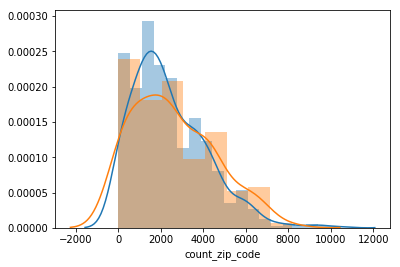

In [54]:
sns.distplot(y_train)
sns.distplot(y_test)

Text(0,0.5,'Predictions')

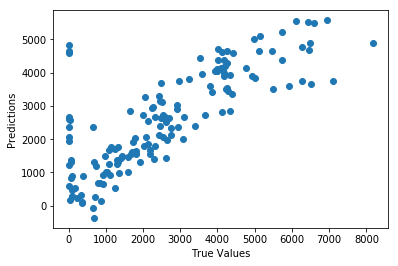

In [55]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Given the potential overfitting, we knew we needed to remove some variables from our model. Remembering the collinearity between rent and income found during EDA, we decided to run a new model in which we removed one of those variables. First, we tried to remove the rent variable. 

In [57]:
inc_data_ols = data_pred.copy()

inc_data_ols['log_income']=np.log(inc_data_ols['income'])

outcome = 'count_zip_code'
predictors = inc_data_ols.drop(['count_zip_code', 'gross_rent'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=inc_data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     122.9
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          3.39e-150
Time:                        11:12:12   Log-Likelihood:                -6366.1
No. Observations:                 755   AIC:                         1.275e+04
Df Residuals:                     744   BIC:                         1.281e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
income           -0.0009      0.004     -0.237      0.813      -0.009       0.007
pop               0.0389      0.002     20.878      0.000       0.035       0.043
fall           5065.1770   1701.964      2.976      0.003    1723.953    8406.401
spring         5061.3907   1701.784      2.974      0.003    1720.520    8402.261
summer         5045.2733   1701.939      2.964      0.003    1704.099    8386.448
winter         5377.3061   1702.161      3.159      0.002    2035.696    8718.917
bronx          4568.0982   1318.363      3.465      0.001    1979.944    7156.252
brooklyn       4239.1118   1366.243      3.103      0.002    1556.961    6921.263
manhattan      4346.1259   1355.963      3.205      0.001    1684.157    7008.095
queens         3526.4757   1382.322      2.551      0.011     812.760    6240.192
staten_island  3869.3356   1397.458      2.769      0.006    1125.905    6612.766
log_income     -774.5971    299.911     -2.583      0.010   -1363.369    -185.825
==============================================================================
Omnibus:                      110.166   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              632.197
Skew:                          -0.499   Prob(JB):                    5.25e-138
Kurtosis:                       7.370   Cond. No.                     7.53e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [58]:
y = inc_data_ols.count_zip_code
X = inc_data_ols.drop(['count_zip_code'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

rmse_train = np.sqrt(np.sum((y_train-y_hat_train)**2))/len(y_train)
rmse_test = np.sqrt(np.sum((y_test-y_hat_test)**2))/len(y_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 43.82197216429136
Test Root Mean Squarred Error: 98.83235861337593


In [59]:
rmse_train_z = rmse_train/np.std(y_train)
rmse_test_z = rmse_test/np.std(y_test)
print('Z Train Root Mean Squarred Error:', rmse_train_z)
print('Z Test Root Mean Squarred Error:', rmse_test_z)

Z Train Root Mean Squarred Error: 0.024684243905370183
Z Test Root Mean Squarred Error: 0.0511791364870236


After not seeing improvement in our model, we tried to instead keep the rent variable while removing the income variable, as we did below.  

In [61]:
rent_data_ols = data_pred.copy()

rent_data_ols['log_income']=np.log(rent_data_ols['income'])

outcome = 'count_zip_code'
predictors = inc_data_ols.drop(['count_zip_code', 'income'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum + " -1" 
model = ols(formula= formula, data=rent_data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     125.2
Date:                Fri, 07 Dec 2018   Prob (F-statistic):          4.41e-152
Time:                        11:14:26   Log-Likelihood:                -6361.7
No. Observations:                 755   AIC:                         1.275e+04
Df Residuals:                     744   BIC:                         1.280e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
gross_rent        0.5174      0.174      2.975      0.003       0.176       0.859
pop               0.0394      0.002     21.338      0.000       0.036       0.043
fall           7699.7684   1046.585      7.357      0.000    5645.157    9754.380
spring         7695.7880   1046.370      7.355      0.000    5641.599    9749.977
summer         7680.1041   1046.465      7.339      0.000    5625.729    9734.479
winter         8012.4469   1046.517      7.656      0.000    5957.969    1.01e+04
bronx          6622.6134    802.386      8.254      0.000    5047.403    8197.824
brooklyn       6323.4620    835.039      7.573      0.000    4684.148    7962.776
manhattan      6319.9164    827.451      7.638      0.000    4695.499    7944.334
queens         5643.9109    838.764      6.729      0.000    3997.284    7290.538
staten_island  6178.2046    903.422      6.839      0.000    4404.645    7951.764
log_income    -1280.2483    186.143     -6.878      0.000   -1645.677    -914.819
==============================================================================
Omnibus:                      113.006   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.351
Skew:                          -0.519   Prob(JB):                    9.89e-142
Kurtosis:                       7.423   Cond. No.                     4.52e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
y = rent_data_ols.count_zip_code
X = rent_data_ols.drop(['count_zip_code'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

rmse_train = np.sqrt(np.sum((y_train-y_hat_train)**2))/len(y_train)
rmse_test = np.sqrt(np.sum((y_test-y_hat_test)**2))/len(y_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 43.82197216429136
Test Root Mean Squarred Error: 98.83235861337593
